### Modelling a depressing synapse
A depressing synapse can be modelled as a high pass filter as explained in <a href="http://models.nengo.ca/sites/models.nengo.ca/files/tripp.eliasmith.final_differentiator.neurcomp.pdf">this</a> paper.

In [22]:
# setup the environment
import nengo
import nengo_gui
from nengo.utils.functions import piecewise
from nengo.utils.compat import is_number
from nengo_gui.ipython import IPythonViz

import seaborn as sns
sns.set_style('whitegrid')

import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
label_size = 18
mpl.rcParams['xtick.labelsize'] = label_size 
mpl.rcParams['ytick.labelsize'] = label_size
mpl.rcParams['axes.titlesize'] = label_size
mpl.rcParams['axes.labelsize'] = label_size
mpl.rcParams['legend.fontsize'] = 15

In [23]:
# define a highpass filter
def highpass(tau, order=1):
    """Differentiated lowpass, raised to a given power."""
    if order < 1 or not is_number(order):
        raise ValueError("order (%s) must be integer >= 1" % order)
    num, den = map(np.poly1d, ([tau, 0], [tau, 1]))
    return nengo.LinearFilter(num**order, den**order)

In [81]:
model = nengo.Network()
tau_highpass = 0.5
stim_value = 1
with model:
    stim1 = nengo.Node(output=piecewise({0: 0, 1: stim_value}))
    stim2 = nengo.Node(output=piecewise({0: 0, 1: stim_value, 1.5:0, 2:stim_value, 2.5:0, 
                    3:stim_value, 3.5:0, 4:stim_value, 4.5:0, 5:stim_value, 5.5:0, 
                    6:stim_value, 6.5:0, 7:stim_value, 7.5:0, 8:stim_value, 8.5:0, 9:stim_value, 9.5:0,
                    10:stim_value, 10.5:0, 11:stim_value, 11.5:0, 12:stim_value, 12.5:0, 9:stim_value, 13:0}))
    stim3 = nengo.Node(output=piecewise({0: 0, 0.5: stim_value, 2.5:0, 4.5:stim_value, 6.5:0, 8.5:stim_value}))
    stim4 = nengo.Node(output=piecewise({0: 0, 0.2: stim_value, 0.4:0, 0.6:stim_value, 0.8:0, 
                    1:stim_value, 1.2:0, 1.4:stim_value, 1.6:0, 1.8:stim_value, 2.0:0, 
                    2.2:stim_value, 2.4:0, 2.6:stim_value, 2.8:0, 3.0:stim_value,
                    3.2:0, 3.4:stim_value, 3.6:0, 3.8:stim_value, 4.0:0, 4.2:stim_value, 
                    4.4:0, 4.6:stim_value, 4.8:0, 5.0:stim_value, 5.2:0, 5.4:stim_value, 
                    5.6:0, 5.8:stim_value, 6.0:0, 6.2:stim_value, 6.4:0, 6.6:stim_value, 
                    6.8:0, 7.0:stim_value, 7.2:0, 7.4:stim_value, 7.6:0, 7.8:stim_value,
                    8.0:0, 8.2:stim_value, 8.4:0, 8.6:stim_value, 8.8:0, 9.0:stim_value,
                    9.2:0, 9.4:stim_value, 9.6:0, 9.8:stim_value, 10.0:0}))
    
    # create the ensemble with added noise at the input of each neuron
    result1 = nengo.Ensemble(200, dimensions=1, noise=nengo.processes.BrownNoise()) 
    result2 = nengo.Ensemble(200, dimensions=1, noise=nengo.processes.BrownNoise()) 
    result3 = nengo.Ensemble(200, dimensions=1, noise=nengo.processes.BrownNoise())
    result4 = nengo.Ensemble(200, dimensions=1, noise=nengo.processes.BrownNoise()) 
    nengo.Connection(stim1, result1, synapse=highpass(tau_highpass))
    nengo.Connection(stim2, result2, synapse=highpass(tau_highpass))
    nengo.Connection(stim3, result3, synapse=highpass(tau_highpass))
    nengo.Connection(stim4, result4, synapse=highpass(tau_highpass))
    
    stim1_p = nengo.Probe(stim1, synapse=0.05)
    result1_p = nengo.Probe(result1, synapse=0.05)
    stim2_p = nengo.Probe(stim2, synapse=0.05)
    result2_p = nengo.Probe(result2, synapse=0.05)
    stim3_p = nengo.Probe(stim3, synapse=0.05)
    result3_p = nengo.Probe(result3, synapse=0.05)
    stim4_p = nengo.Probe(stim4, synapse=0.05)
    result4_p = nengo.Probe(result4, synapse=0.05)
       
sim = nengo.Simulator(model)
sim.run(13)   

Building finished in 0:00:01.                                                   
Simulating finished in 0:00:12.                                                 


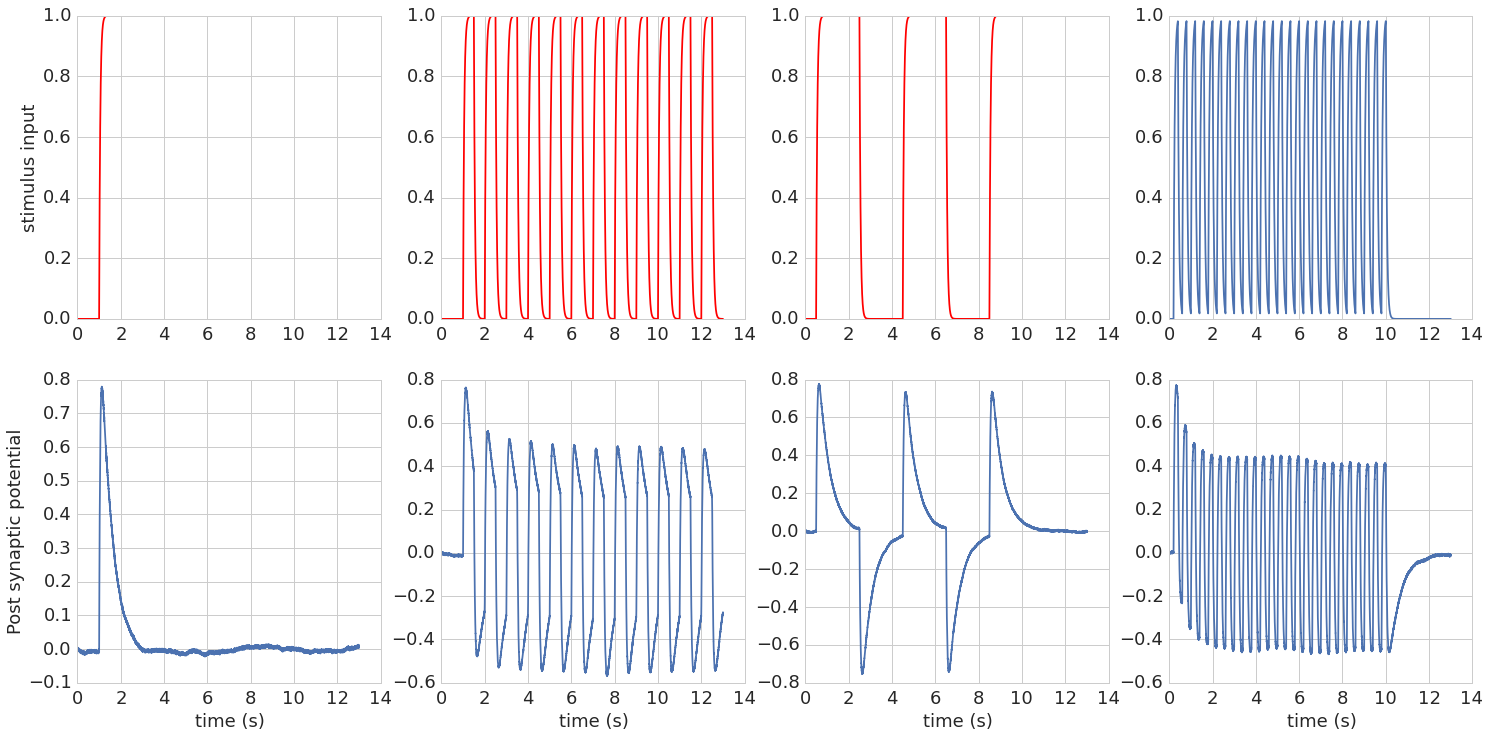

In [82]:
t = sim.trange()
fig = plt.figure(figsize=(25,25))

ax1 = fig.add_subplot(441)
ax1.plot(t, sim.data[stim1_p], 'r')
ax1.set_ylabel("stimulus input")

ax2 = fig.add_subplot(442)
ax2.plot(t, sim.data[stim2_p], 'r')

ax3 = fig.add_subplot(443)
ax3.plot(t, sim.data[stim3_p], 'r')

ax4 = fig.add_subplot(444)
ax4.plot(t, sim.data[stim4_p])

ax5 = fig.add_subplot(445)
ax5.plot(t, sim.data[result1_p])
ax5.set_ylabel("Post synaptic potential")
ax5.set_xlabel("time (s)")

ax6 = fig.add_subplot(446)
ax6.plot(t, sim.data[result2_p])
ax6.set_xlabel("time (s)")

ax7 = fig.add_subplot(447)
ax7.plot(t, sim.data[result3_p])
ax7.set_xlabel("time (s)")

ax8 = fig.add_subplot(448)
ax8.plot(t, sim.data[result4_p])
ax8.set_xlabel("time (s)")

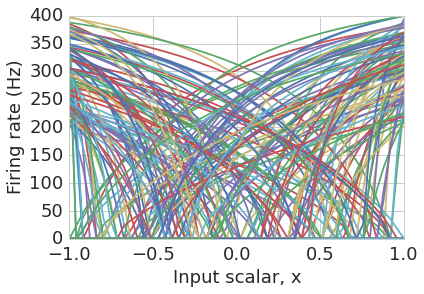

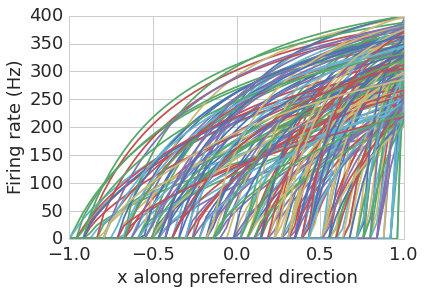

In [41]:
# plot ensemble tuning curves
from nengo.utils.ensemble import tuning_curves
from nengo.utils.ensemble import response_curves
with sim:
    plt.figure()
    plt.plot(*tuning_curves(result1, sim))
    plt.ylabel("Firing rate (Hz)")
    plt.xlabel("Input scalar, x")

    plt.figure()
    plt.plot(*response_curves(result1, sim))
    plt.ylabel("Firing rate (Hz)")
    plt.xlabel("x along preferred direction")

In [ ]:
IPythonViz(model)